<Figure size 1000x1000 with 0 Axes>

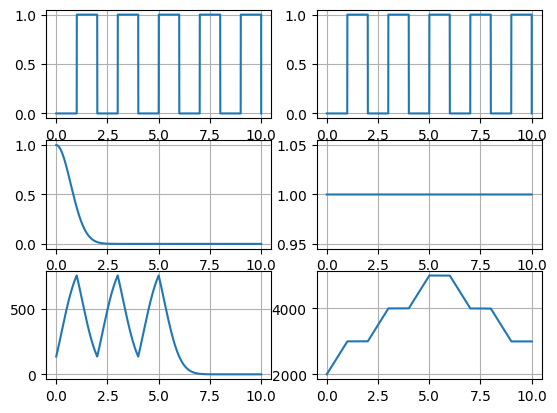

In [9]:
import numpy as np
import matplotlib.pyplot as plt

A = 1
T = 2
ampl = 1
x = np.linspace(0, 10, 10000)


def signal_func(x):
    if x % T < 1:
        return 0
    else:
        return ampl


def signal_func_arr(x):
    y = []
    for xi in x:
        y.append(signal_func(xi))

    return np.asarray(y)


def kernel_func(x):
    return A * np.exp(-(x ** 2))


def kernel_func_linear(x):
    return A * np.ones_like(x)


signal = signal_func_arr(x)
kernel = kernel_func(x)
conv = np.convolve(signal, kernel, mode="same")

plt.figure(figsize=(10, 10))
_, axs = plt.subplots(3, 2)
axs[0, 0].plot(x, signal)
axs[0, 0].grid(True)

axs[1, 0].plot(x, kernel)
axs[1, 0].grid(True)

axs[2, 0].plot(x, conv)
axs[2, 0].grid(True)

kernel = kernel_func_linear(x)
conv = np.convolve(signal, kernel, mode="same")

axs[0, 1].plot(x, signal)
axs[0, 1].grid(True)

axs[1, 1].plot(x, kernel)
axs[1, 1].grid(True)

axs[2, 1].plot(x, conv)
axs[2, 1].grid(True)

plt.show()


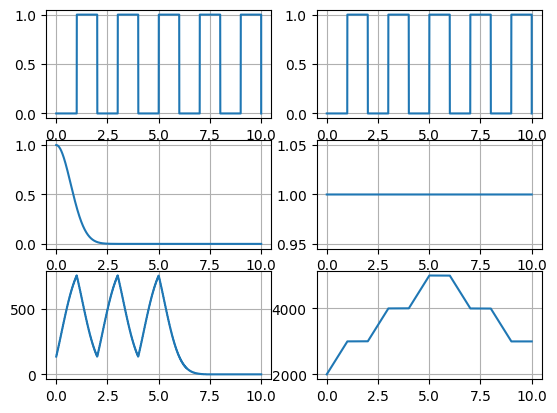

In [10]:
def my_convolve(signal, kernel):
    new_signal = np.zeros(2 * signal.shape[0] - 1)

    for i in range(signal.shape[0]):
        new_signal[i + signal.shape[0] // 2] = signal[i]

    res = np.zeros_like(signal)

    for i in range(signal.shape[0]):
        res[i] = np.sum(new_signal[i: kernel.shape[0] + i] * kernel[::-1])

    return res


signal = signal_func_arr(x)
kernel = kernel_func(x)
conv = my_convolve(signal, kernel)

_, axs = plt.subplots(3, 2)
axs[0, 0].plot(x, signal)
axs[0, 0].grid(True)

axs[1, 0].plot(x, kernel)
axs[1, 0].grid(True)

axs[2, 0].plot(x, conv)
axs[2, 0].grid(True)

kernel = kernel_func_linear(x)
conv = my_convolve(signal, kernel)

axs[0, 1].plot(x, signal)
axs[0, 1].grid(True)

axs[1, 1].plot(x, kernel)
axs[1, 1].grid(True)

axs[2, 1].plot(x, conv)
axs[2, 1].grid(True)

plt.show()


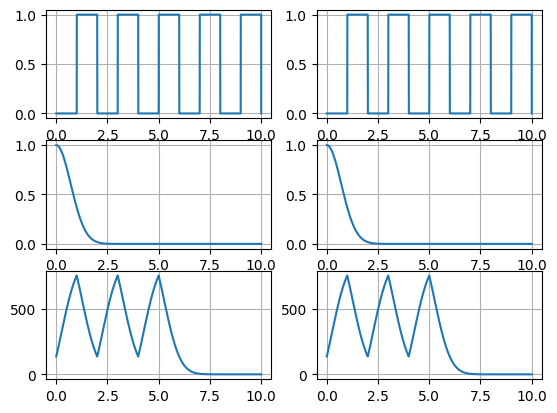

In [12]:
from scipy.fftpack import fft, ifft

signal = signal_func_arr(x)
kernel = kernel_func(x)
conv = np.convolve(signal, kernel, mode="same")

_, axs = plt.subplots(3, 2)
axs[0, 0].plot(x, signal)
axs[0, 0].grid(True)

axs[1, 0].plot(x, kernel)
axs[1, 0].grid(True)

axs[2, 0].plot(x, conv)
axs[2, 0].grid(True)

X = fft(signal, 2 * len(signal) - 1)
H = fft(kernel, 2 * len(kernel) - 1)

Y = X * H

y_conv = ifft(Y)

y_conv = np.real(y_conv)

axs[0, 1].plot(x, signal)
axs[0, 1].grid(True)

axs[1, 1].plot(x, kernel)
axs[1, 1].grid(True)

axs[2, 1].plot(x, y_conv[len(signal) // 2: len(signal) // 2 + len(signal)])
axs[2, 1].grid(True)

plt.show()


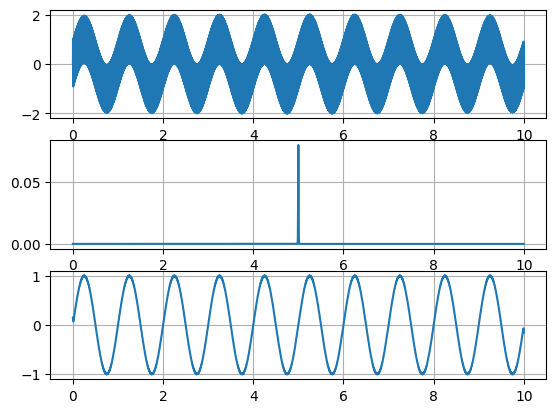

In [22]:
A = 1
T = 2
ampl = 1
time = 10
fmax = 1000
N_samples = time * fmax
x = np.linspace(0, time, N_samples)


def signal_func(t):
    signal = np.sin(2 * np.pi * 1 * t) + np.sin(2 * np.pi * 100 * t)
    return signal


def gaussian_kernel(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    kernel = np.exp(-x**2 / (2 * sigma**2))
    return kernel / np.sum(kernel)


def gaussian_frequency_filter(frequencies, peak, w):
    sigma_f = w * (2 * np.pi - 1) / 4 * np.pi
    return np.exp(-0.5 * ((frequencies - peak) / sigma_f) ** 2)


signal = signal_func(x)
kernel = gaussian_kernel(N_samples, 5)
conv = np.convolve(signal, kernel, mode="same")

_, axs = plt.subplots(3, 1)
axs[0].plot(x, signal)
axs[0].grid(True)

axs[1].plot(x, kernel)
axs[1].grid(True)

axs[2].plot(x, conv)
axs[2].grid(True)

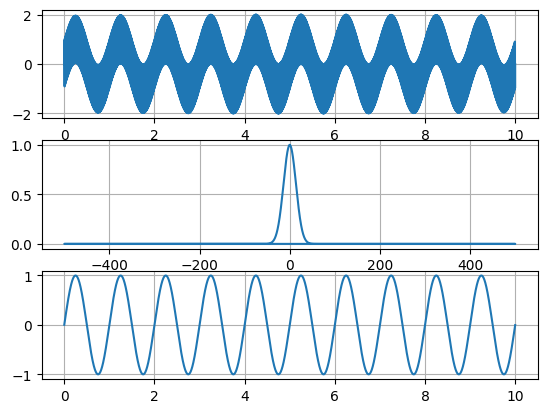

In [28]:
X = fft(signal)

freq = np.fft.fftfreq(N_samples, 1 / fmax)
sigma = 1
peak = 0

H = gaussian_frequency_filter(freq, peak, 2 * sigma * (2 * np.log(2) ** 0.5))

Y = X * H

y_conv = ifft(Y)

y_conv = np.real(y_conv)

_, axs = plt.subplots(3, 1)

axs[0].plot(x, signal)
axs[0].grid(True)

axs[1].plot(freq, H)
axs[1].grid(True)

axs[2].plot(x, y_conv)
axs[2].grid(True)

plt.show()

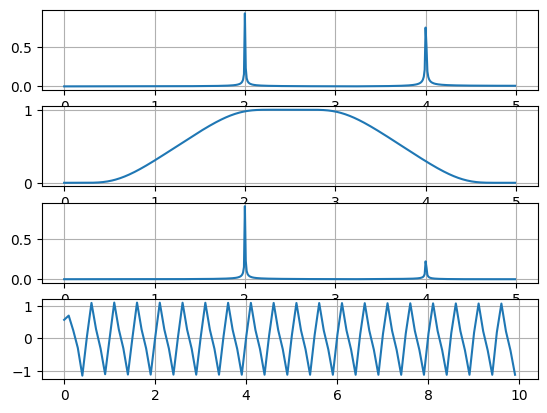

In [31]:
A = 1
T = 2
ampl = 1
time = 100
fmax = 10
N_samples = time * fmax

def signal_func(t):
    signal = np.sin(2 * np.pi * 2 * t) + np.sin(2 * np.pi * 4 * t)
    return signal

def za(e, n, i):
    return e * (n - 1) * ((1 / i) + (1 / (i - e * (n - 1))))


def zb(e, n, i):
    return e * (n - 1) * ((1/(n - 1 - i)) + (1 / ((1 - e) * (n - 1) - i)))


def planka_filter(freq, e):
    N = len(freq) // 2
    filter = np.zeros_like(freq)

    for i in range(N):
        if i == 0:
            filter[i] = 0
            filter[N + i] = 0
        elif 0 < i < e * (N - 1):
            filter[i] = 1 / (np.exp(za(e, N, i)) + 1)
            filter[N + i] = 1 / (np.exp(za(e, N, i)) + 1)
        elif e * (N - 1) <= i <= (1 - e) * (N - 1):
            filter[i] = 1
            filter[N + i] = 1
        elif (1 - e) * (N - 1) < i < (N - 1):
            filter[i] = 1 / (np.exp(zb(e, N, i)) + 1)
            filter[N + i] = 1 / (np.exp(zb(e, N, i)) + 1)
        else:
            filter[i] = 0
            filter[N + i] = 0

    return filter


x = np.linspace(0, time, N_samples)
signal = signal_func(x)

X = fft(signal)

freq = np.fft.fftfreq(N_samples, 1 / fmax)

e = 0.5

H = planka_filter(freq, e)

Y = X * H

y_conv = ifft(Y)

y_conv = np.real(y_conv)

_, axs = plt.subplots(4, 1)
axs[0].plot(freq[0: N_samples // 2], 2.0 / N_samples * np.abs(X[0:N_samples // 2]))
axs[0].grid(True)

axs[1].plot(freq[0: N_samples // 2], np.abs(H[0:N_samples // 2]))
axs[1].grid(True)

axs[2].plot(freq[0: N_samples // 2], 2.0 / N_samples * np.abs(Y[0:N_samples // 2]))
axs[2].grid(True)

axs[3].plot(x[0: N_samples // 10], y_conv[0: N_samples // 10])
axs[3].grid(True)

plt.show()

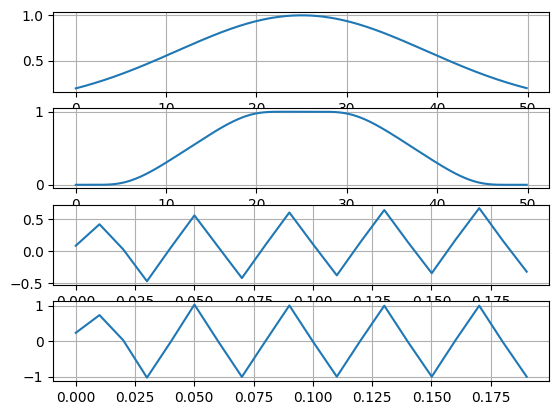

In [34]:
def signal_func(t):
    signal = np.sin(2 * np.pi * 1 * t) + np.sin(2 * np.pi * 25 * t)
    return signal

_, axs = plt.subplots(4, 1)

x = np.linspace(0, time, N_samples)
signal = signal_func(x)

X = fft(signal)

freq = np.fft.fftfreq(N_samples, 1 / fmax)

sigma = 1
peak = 25

H = gaussian_frequency_filter(freq, peak, 2 * sigma * (2 * np.log(2) ** 0.5))

Y = X * H

y_conv = ifft(Y)

y_conv = np.real(y_conv)

axs[0].plot(freq[0: N_samples // 2], np.abs(H[0:N_samples // 2]))
axs[0].grid(True)

axs[2].plot(x[0: N_samples // 50], y_conv[0: N_samples // 50])
axs[2].grid(True)

e = 0.5

H = planka_filter(freq, e)

Y = X * H

y_conv = ifft(Y)

y_conv = np.real(y_conv)

axs[1].plot(freq[0: N_samples // 2], np.abs(H[0:N_samples // 2]))
axs[1].grid(True)

axs[3].plot(x[0: N_samples // 50], y_conv[0: N_samples // 50])
axs[3].grid(True)

plt.show()
